In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitlib

In [2]:
%load_ext autoreload
%autoreload 2

In [142]:
Dp_M_full = np.fromfile('data/kpipi_cut')

In [144]:
# simulating a low statistics dist
Dp_M = np.random.choice(Dp_M_full,10000)

In [145]:
tanh_kpp = fitlib.Convolution([0], 1869.65, 1)
kpp_data = np.loadtxt("./data/kpp_histogram.csv", delimiter=",", skiprows=1)
tanh_kpp.d_x = kpp_data[:, 0]
tanh_kpp.c = kpp_data[:, 1]

In [146]:
fit = fitlib.Fitter.binned(Dp_M, bins=200,range=(1790,1970))

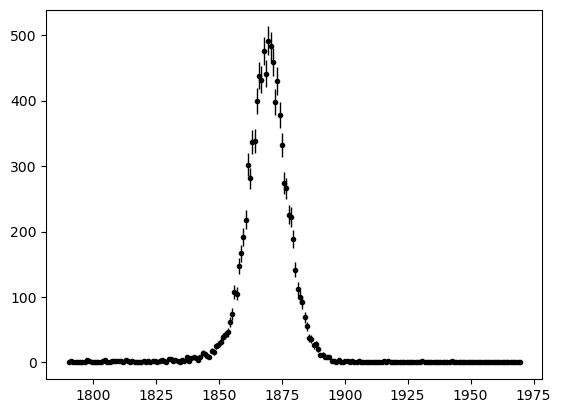

In [147]:
fit.plot_data()

In [169]:
mass = fitlib.f(1850,1900)

# we need to normalize for mle
w1 = fitlib.f(0,0.5,1)
w2 = fitlib.f(0,0.5,1)
n_tot = np.sum(fit.y)

fit.pdf = [tanh_kpp.pdf(n=n_tot * w1, mu=mass), tanh_kpp.pdf(n=n_tot * w2, mu=mass),fitlib.Exp(n=n_tot * (1-w1-w2), x0=1790)]

In [170]:
fit.BinnedMLE(9999999)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -4.469e+04                 │             Nfcn = 1470              │
│ EDM = 0.0014 (Goal: 0.0002)      │           time = 11.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   0.018   │   0.004   │            │            │    0    │    1    │       │
│ 1 │ x1   │ 1.86949e3 │ 0.00011e3 │            │            │  1850   │  1900   │       │
│ 2 │ x2   │    41     │     7     │            │            │    0    │         │       │
│ 3 │ x3   │  0.9838   │  0.0017   │            │            │    0    │    1    │       │
│ 4 │ x4   │   7.54    │   0.10    │            │            │    0    │         │       │
│ 5 │ x5   │  1.790e3  │  0.018e3  │            │            │         │         │  yes  │
│ 6 │ x6   │   0.103   │   0.035   │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬──────────────────────────────────────────────────────────────────────────────┐
│    │         x0         x1         x2         x3         x4         x5         x6 │
├────┼──────────────────────────────────────────────────────────────────────────────┤
│ x0 │   1.99e-05  -0.007e-3 -20.409e-3    -0.2e-6  -0.166e-3          0         -0 │
│ x1 │  -0.007e-3      0.013      0.004     0.1e-6     -0.001      0.000     0.0000 │
│ x2 │ -20.409e-3      0.004       50.8   278.4e-6      0.215          0     0.0002 │
│ x3 │    -0.2e-6     0.1e-6   278.4e-6   2.77e-06     2.3e-6          0         -0 │
│ x4 │  -0.166e-3     -0.001      0.215     2.3e-6    0.00921      0.000     0.0000 │
│ x5 │          0      0.000          0          0      0.000          0     0.0000 │
│ x6 │         -0     0.0000     0.0002         -0     0.0000     0.0000    0.00123 │
└────┴──────────────────────────────────────────────────────────────────────────────┘

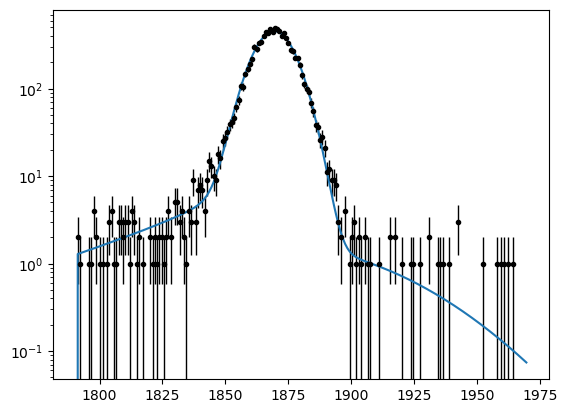

In [171]:
fit.plot_data()
fit.plot_fit()
plt.yscale('log')